# Project Sample

### Below is a example which you can follow for working on the final project.

We will first initializa some dependencies and data structures.

We use BeautifulSoup for scraping website - imdb

We have used matplotlib for visualizing the scraped information.

In your final project, you will have to implement something, similar to this sample project. 

Scraping some meaningful data and trying to visualize the data to infer some of the information that we have.

1. Import Dependencies

In [2]:
from time import time,sleep
from random import randint
from IPython.core.display import clear_output
from requests import get
from bs4 import BeautifulSoup

2. Initialize all the lists which will be used for visualizations.

In [3]:
names = []
years = []
imdb_ratings = []
metascores = []
votes = []

3. Preparing the monitoring of the loop by using start_time. Also, we have specified no. of pages and years_url.

In [4]:
start_time = time()
requests = 0
pages = [str(i) for i in range(1,5)]
years_url = [str(i) for i in range(2000,2019)]

4. Specifying headers which will be used for get request.

In [5]:
headers = {"Accept-Language": "en-US, en;q=0.5"}


5. For every year in the interval 2000-2017, scrape the imdb website to fetch movie names, ratings, metadata, upvotes, etc. There can number of ways to do this, but here to keep it simple for understanding, we are usung three loops. For each page request and for each movie- container in it, we are scraping the above mentioned content.


In [6]:
for year_url in years_url:

    # For every page in the interval 1-4
    for page in pages:

        # Make a get request
        response = get('http://www.imdb.com/search/title?release_date=' + year_url + 
        '&sort=num_votes,desc&page=' + page, headers = headers)

        # Pause the loop
        sleep(randint(8,15))

        # Monitor the requests
        requests += 1
        elapsed_time = time() - start_time
        print('Request:{}; Frequency: {} requests/s'.format(requests, requests/elapsed_time))
        clear_output(wait = True)

        # Throw a warning for non-200 status codes
        if response.status_code != 200:
            print('Request: {}; Status code: {}'.format(requests, response.status_code))

        # Break the loop if the number of requests is greater than expected
        if requests > 50:
            print('Number of requests was greater than expected.')  
            break 

        # Parse the content of the request with BeautifulSoup
        page_html = BeautifulSoup(response.text, 'html.parser')

        # Select all the 50 movie containers from a single page
        mv_containers = page_html.find_all('div', class_ = 'lister-item mode-advanced')

        # For every movie of these 50
        for container in mv_containers:
            # If the movie has a Metascore, then:
            if container.find('div', class_ = 'ratings-metascore') is not None:

                # Scrape the name
                name = container.h3.a.text
                names.append(name)

                # Scrape the year 
                year = container.h3.find('span', class_ = 'lister-item-year').text
                years.append(year)

                # Scrape the IMDB rating
                imdb = float(container.strong.text)
                imdb_ratings.append(imdb)

                # Scrape the Metascore
                m_score = container.find('span', class_ = 'metascore').text
                metascores.append(int(m_score))

                # Scrape the number of votes
                vote = container.find('span', attrs = {'name':'nv'})['data-value']
                votes.append(int(vote))

Number of requests was greater than expected.


6. We can now convert these lists of scraped data into a dataframe which can be used for our visualizations.

In [12]:
import pandas as pd

movie_ratings = pd.DataFrame({'movie': names,
                              'year': years,
                              'imdb': imdb_ratings,
                              'metascore': metascores,
                              'votes': votes})
print(movie_ratings.info())
movie_ratings.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2294 entries, 0 to 2293
Data columns (total 5 columns):
imdb         2294 non-null float64
metascore    2294 non-null int64
movie        2294 non-null object
votes        2294 non-null int64
year         2294 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 89.7+ KB
None


,imdb,metascore,movie,votes,year
0,8.5,67,Gladiator,1194711,(2000)
1,8.5,80,Memento,1018989,(2000)
2,8.3,55,Snatch,710051,(2000)
3,8.3,68,Requiem for a Dream,691637,(2000)
4,7.4,64,X-Men,529333,(2000)
5,7.8,73,Cast Away,467641,(2000)
6,7.6,64,American Psycho,424959,(2000)
7,7.3,62,Unbreakable,340196,(2000)
8,7.0,73,Meet the Parents,291177,(2000)
9,6.1,59,Mission: Impossible II,287962,(2000)


7. We can see the dataframe as below:

In [13]:
movie_ratings = movie_ratings[['movie', 'year', 'imdb', 'metascore', 'votes']]
movie_ratings.head()

,movie,year,imdb,metascore,votes
0,Gladiator,(2000),8.5,67,1194711
1,Memento,(2000),8.5,80,1018989
2,Snatch,(2000),8.3,55,710051
3,Requiem for a Dream,(2000),8.3,68,691637
4,X-Men,(2000),7.4,64,529333


8. Make the years unique.

In [14]:
movie_ratings['year'].unique()

array(['(2000)', '(I) (2000)', '(2001)', '(2002)', '(2003)', '(2004)',
       '(I) (2004)', '(2005)', '(I) (2005)', '(2006)', '(I) (2006)',
       '(2007)', '(I) (2007)', '(2008)', '(I) (2008)', '(2009)',
       '(I) (2009)', '(2010)', '(I) (2010)', '(2011)', '(I) (2011)'],
      dtype=object)

9. We can check the minimum and maximum ratings given to a movie 

In [19]:
movie_ratings.describe().loc[['min', 'max'], ['imdb', 'metascore']]

,imdb,metascore
min,4.7,24.0
max,9.0,98.0


In [0]:
movie_ratings['n_imdb'] = movie_ratings['imdb'] * 10
movie_ratings.to_csv('movie_ratings.csv')

10. Now we can use the scraped information for visualization.

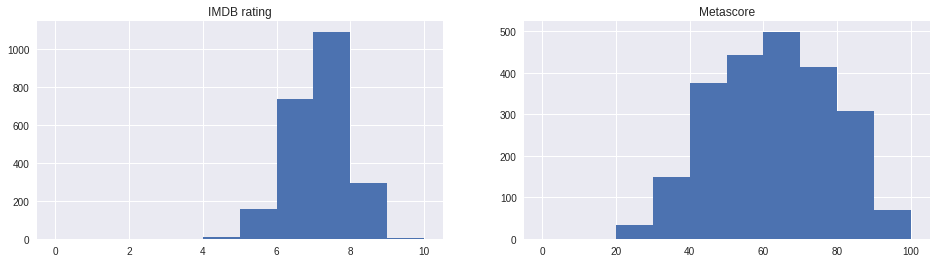

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (16,4))
ax1, ax2 = fig.axes

ax1.hist(movie_ratings['imdb'], bins = 10, range = (0,10)) # bin range = 1
ax1.set_title('IMDB rating')

ax2.hist(movie_ratings['metascore'], bins = 10, range = (0,100)) # bin range = 10
ax2.set_title('Metascore')

for ax in fig.axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

plt.show()

In [26]:
import pandas as pd

df = pd.read_csv("movie_ratings.csv")

print(df[0:5])

   Unnamed: 0                movie    year  imdb  metascore    votes  n_imdb
0           0            Gladiator  (2000)   8.5         67  1194711    85.0
1           1              Memento  (2000)   8.5         80  1018989    85.0
2           2               Snatch  (2000)   8.3         55   710051    83.0
3           3  Requiem for a Dream  (2000)   8.3         68   691637    83.0
4           4                X-Men  (2000)   7.4         64   529333    74.0


11. We can see from below graph how avg votes increase with the increase in imdb rating, for ratings between 8 and 10.

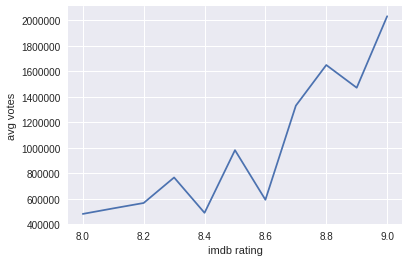

In [27]:
import matplotlib.pyplot as plt

num_rows = df[(df['imdb'] >= 8.0) & (df['imdb'] <= 10.0)]

dummy=num_rows.iloc[:,[3,5]]

y1=pd.DataFrame(dummy.groupby(['imdb'])['votes','imdb'].mean())

col1=list(round(y1.imdb,2))
col2=list(round(y1.votes,2))


plt.plot(col1,col2)
plt.xlabel('imdb rating')
plt.ylabel('avg votes')

plt.show()

12. Below graph demonstrates how avg votes vary with the increase in metascore ratings, which are between 60- 100.

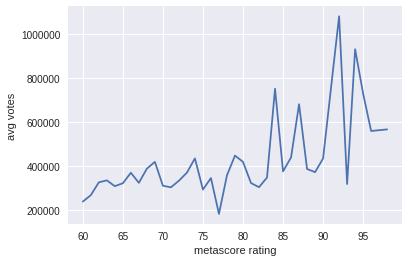

In [28]:
import matplotlib.pyplot as plt

num_rows = df[(df['metascore'] >= 60) & (df['metascore'] <= 100)]

dummy=num_rows.iloc[:,[4,5]]

y1=pd.DataFrame(dummy.groupby(['metascore'])['votes','metascore'].mean())

col1=list(round(y1.metascore,2))
col2=list(round(y1.votes,2))


plt.plot(col1,col2)
plt.xlabel('metascore rating')
plt.ylabel('avg votes')

plt.show()

13. Finally, we can check the 10 best movies on imdb according to ratings, by using below visualization.

In [39]:
df = df.drop_duplicates('movie')
topRating = df.sort_values(by=['imdb'], ascending=False).nlargest(10, 'imdb')
topVoted = df.sort_values(by=['votes'], ascending=False).nlargest(10, 'votes')
print(topRating)

      Unnamed: 0                                              movie    year  \
1615        1615                                    The Dark Knight  (2008)   
715          715      The Lord of the Rings: The Return of the King  (2003)   
343          343  The Lord of the Rings: The Fellowship of the Ring  (2001)   
1975        1975                                          Inception  (2010)   
523          523              The Lord of the Rings: The Two Towers  (2002)   
525          525                                        City of God  (2002)   
350          350                                      Spirited Away  (2001)   
0              0                                          Gladiator  (2000)   
1              1                                            Memento  (2000)   
2161        2161                                   The Intouchables  (2011)   

      imdb  metascore    votes  n_imdb  
1615   9.0         84  2032631    90.0  
715    8.9         94  1471342    89.0  
343    

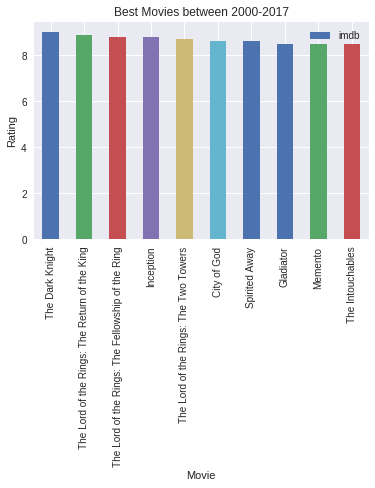

In [38]:
# Bar Chart for 10 top most ratings
plot = topRating.plot(kind='bar', title='Best Movies between 2000-2017', x='movie', y='imdb')
plot.set_xlabel("Movie")
plot.set_ylabel("Rating")
plt.savefig('Best Reviewed.png')
plt.show()

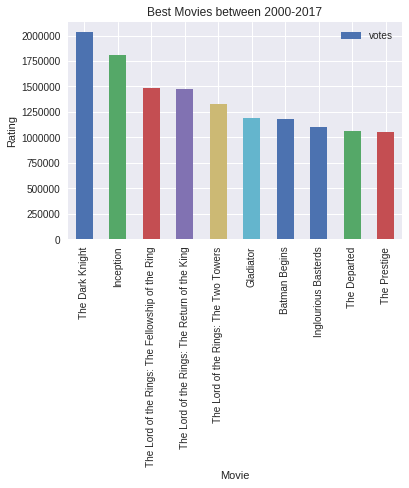

In [40]:
# Bar Chart for 10 top most voted
plot = topVoted.plot(kind='bar', title='Best Movies between 2000-2017', x='movie', y='votes')
plot.set_xlabel("Movie")
plot.set_ylabel("Rating")
plt.savefig('Best Reviewed.png')
plt.show()